In [2]:
# https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
import numpy as np
import pandas as pd
pd.set_option('html', False)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import warnings; warnings.simplefilter('ignore')

import palettable

# Panorama das funções:
# http://stanford.edu/~mwaskom/software/seaborn/api.html#api-ref

In [3]:
from seaborn import *

In [6]:
atlas = pd.read_csv('atlas.csv')

In [ ]:
atlas2 = atlas.iloc[:, 10:13]

In [18]:
atlas3 = atlas[(atlas['nome_uf'] == 'são paulo') | (atlas['nome_uf'] == 'minas gerais')]

# Visualizando distribuições 

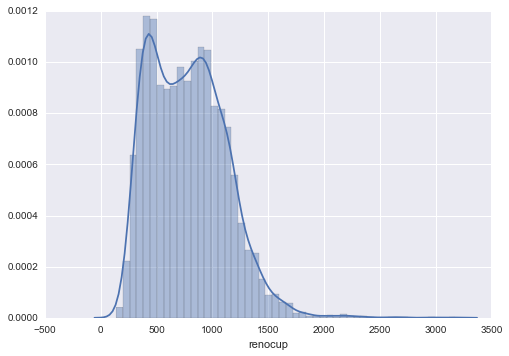

In [4]:
distplot(atlas.renocup);

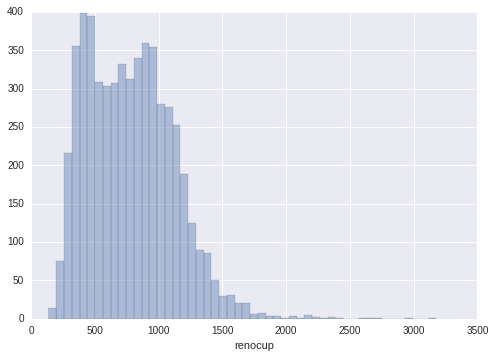

In [11]:
distplot(atlas.renocup, kde = False);

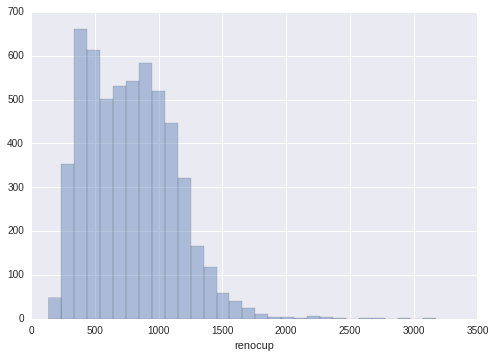

In [14]:
sns.distplot(atlas.renocup, bins = 30, kde = False);

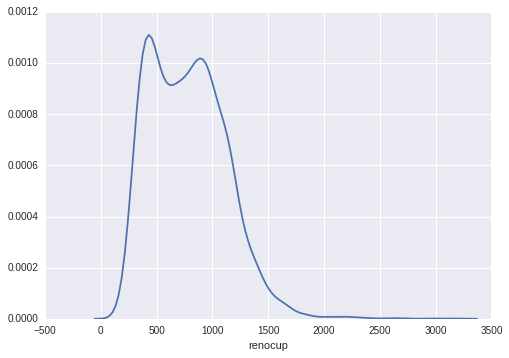

In [15]:
distplot(atlas.renocup, hist = False);

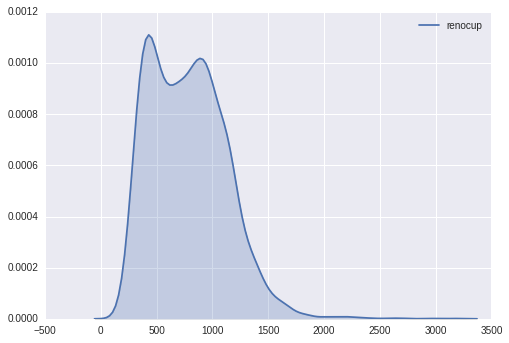

In [16]:
sns.kdeplot(x, shade=True);

### distribuições bivariadas


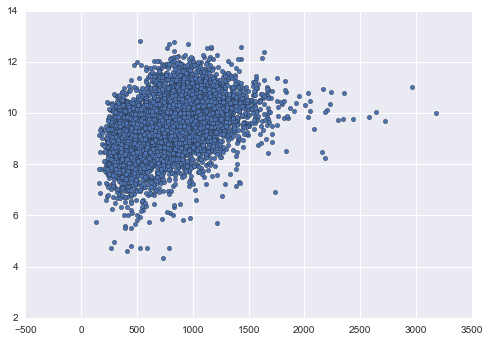

In [17]:
plt.scatter(atlas.renocup, atlas.e_anosestudo);

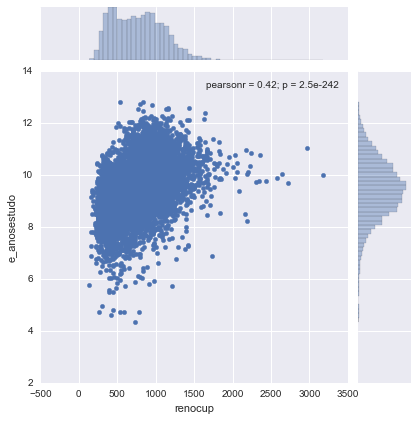

In [18]:
jointplot('renocup', 'e_anosestudo', data = atlas);

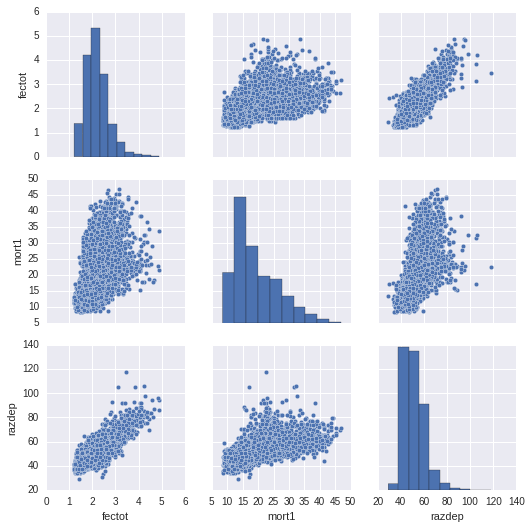

In [17]:
atlas2 = atlas.iloc[:, 10:13]

pairplot(atlas2);

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s availible through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background

### Visualizando relacionamentos lineares

Enfatizam padrões nos dados, tornando-os mais claros do no que nas distribuições conjuntas.

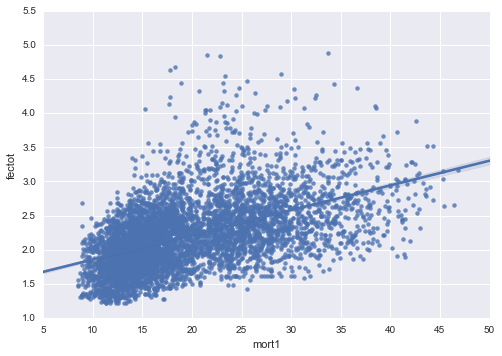

In [22]:
regplot('mort1', 'fectot', atlas);

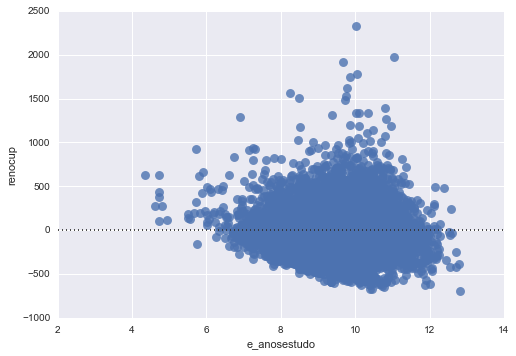

In [23]:
residplot('e_anosestudo', 'renocup', atlas,
              scatter_kws={"s": 80});

regplot e lmplot In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.  regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. 

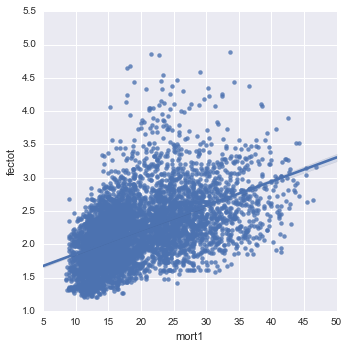

In [34]:
# mais restritivo, exige tidy data

sns.lmplot('mort1', 'fectot', data = atlas); 

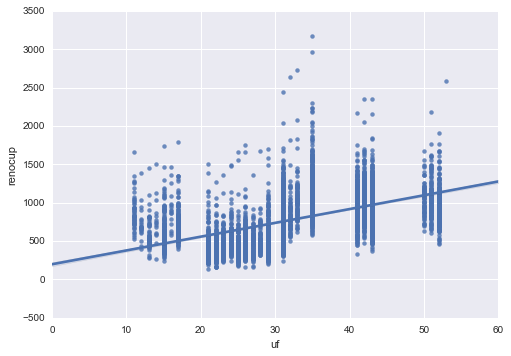

In [37]:
sns.regplot('uf', 'renocup', atlas);


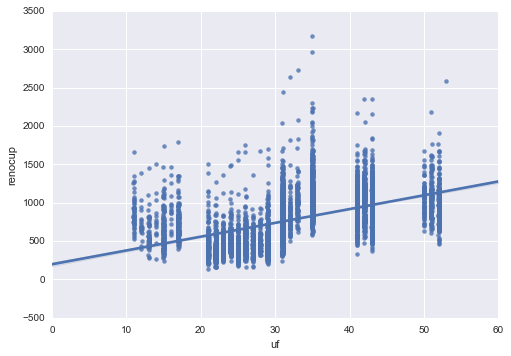

In [41]:
sns.regplot('uf', 'renocup', atlas, x_jitter=.05);

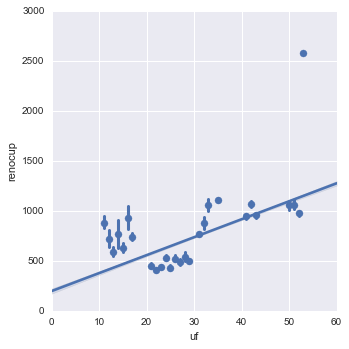

In [42]:
# A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.lmplot('uf', 'renocup', atlas, x_estimator=np.mean);

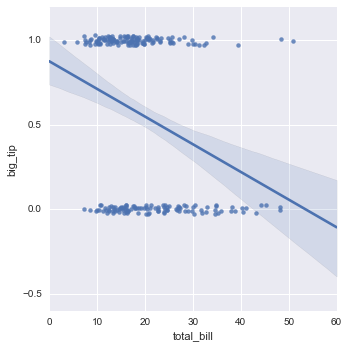

In [25]:
# When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

# usa o conjunto de dados TIPS
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

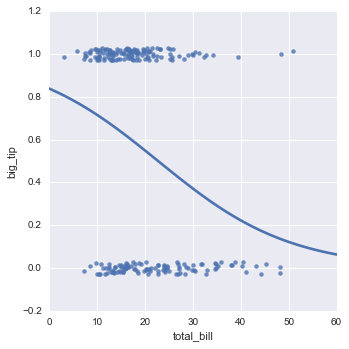

In [26]:
# para acelerar o processo, não calcule o intervalo de confiança (pois ele usa bootstrap)
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, ci=None, y_jitter=.03);

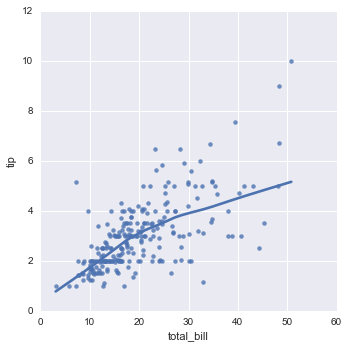

In [27]:
# An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

## Anscombe

The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [29]:
anscombe = sns.load_dataset("anscombe")

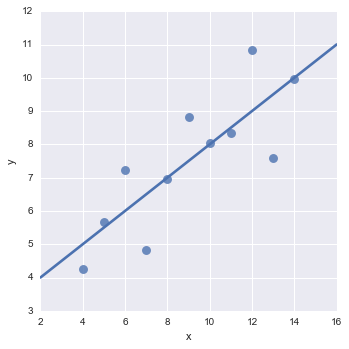

In [30]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

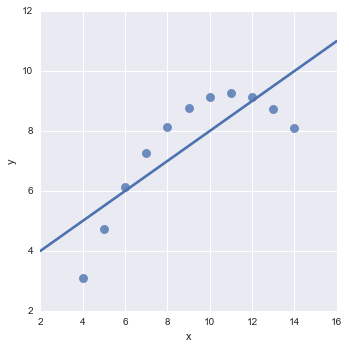

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

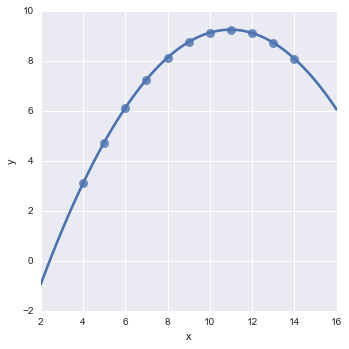

In [32]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});


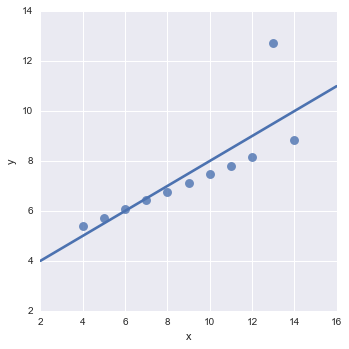

In [33]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});


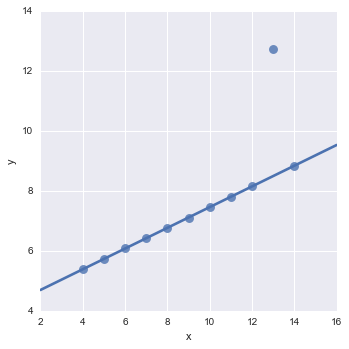

In [34]:
# In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

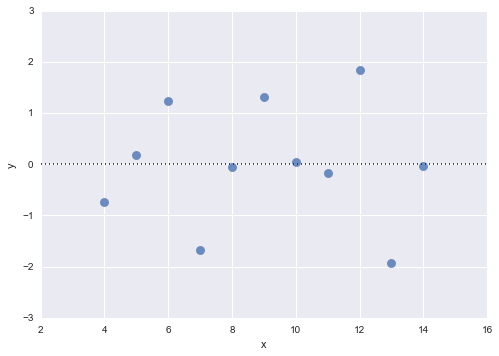

In [35]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

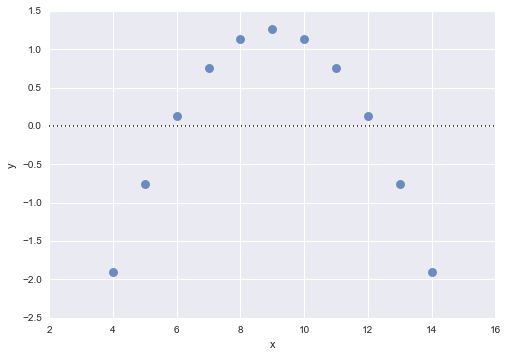

In [36]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

# Condicionando em outras variáveis: lmplot

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationsihp, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

Veja [aqui](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#controlling-the-size-and-shape-of-the-plot) a explicação de porque elas são diferentes. Basicamente, lmplot usa configurações apra se aplicat a cada faceta.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them

In [25]:
atlas3 = atlas[(atlas['nome_uf'] == 'são paulo') | (atlas['nome_uf'] == 'minas gerais')]
atlas3.shape

(1498, 84)

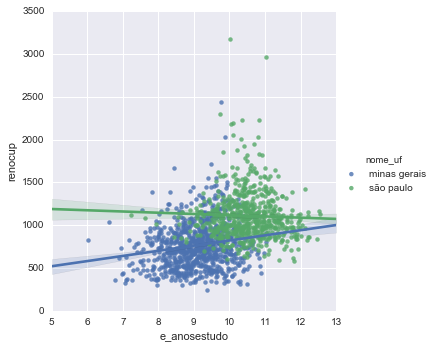

In [26]:
lmplot('e_anosestudo', 'renocup', hue='nome_uf', data=atlas3)

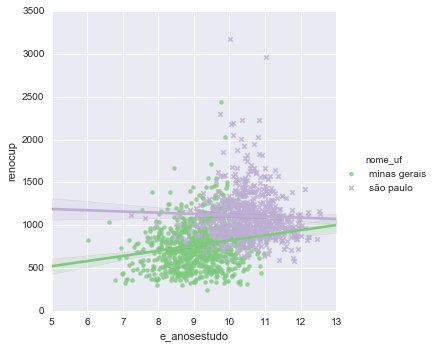

In [27]:
# modificando os marcadores e as cores
sns.lmplot('e_anosestudo', 'renocup', hue='nome_uf', data=atlas3,
          markers=["o", "x"], palette="Accent")

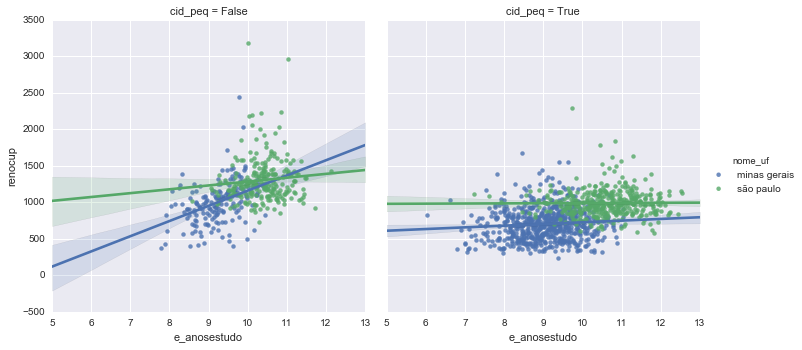

In [205]:
# para adicionar outra variável, indique coluna ou linha (row)
sns.lmplot('e_anosestudo', 'renocup', hue='nome_uf', col='cid_peq', data=atlas3)

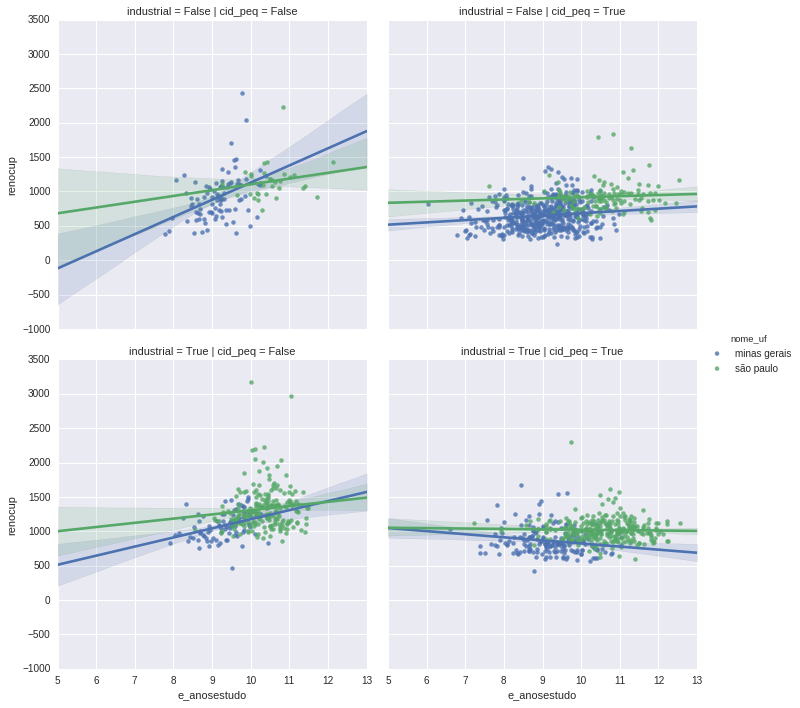

In [20]:
# criar nova variável categórica
atlas3['industrial'] = atlas3.p_transf > 10.15

# para adicionar outra variável, indique coluna ou linha (row)
lmplot('e_anosestudo', 'renocup', hue='nome_uf', col='cid_peq', row='industrial', data=atlas3);

Para usar a reta de regressão em outros gráficos além de reg e lm, o show the linear regression fit on the joint axes by passing kind="reg".

Outra coisa:
Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter

## Dados categóricos

It’s useful to divide seaborn’s categorical plots into three groups: 

- those that show each observation at each level of the categorical variable (como scatter plot)- swarmplot() and stripplot() 
- those that show an abstract representation of each distribution of observations - boxplot() and violinplot()
- those that apply a statistical estimation to show a measure of central tendency and confidence interval. - barplot() and pointplot()

There is also the higher-level factorplot(), which combines these functions with a FacetGrid to apply a categorical plot across a grid of figure panels.


In [219]:
sns.set(style="whitegrid", color_codes=True)

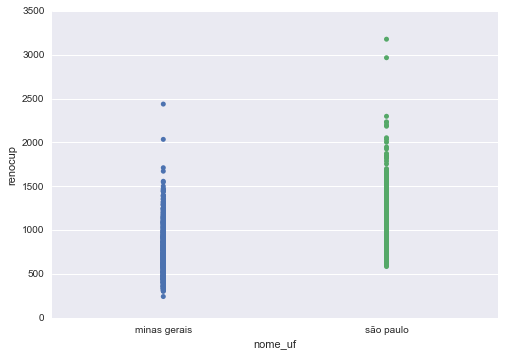

In [257]:
sns.stripplot(atlas3.nome_uf, atlas3.renocup);

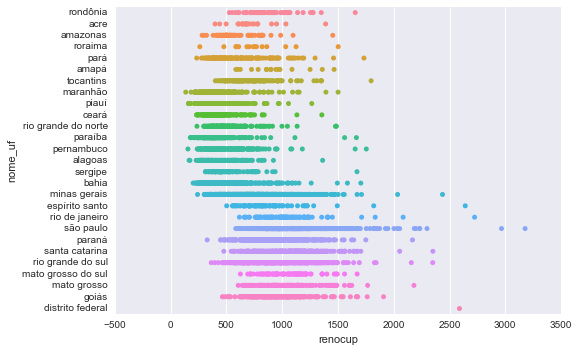

In [258]:
sns.stripplot(atlas.renocup, atlas.nome_uf);

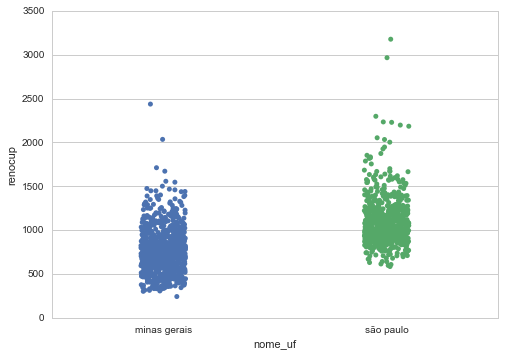

In [226]:
sns.stripplot(atlas3.nome_uf, atlas3.renocup, jitter=True)

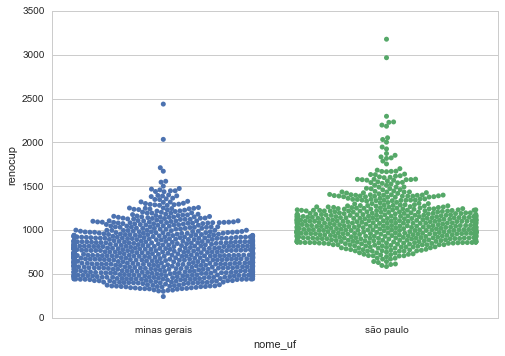

In [227]:
# algorithm that avoids overlapping points (demora um pouco)
sns.swarmplot(atlas3.nome_uf, atlas3.renocup)

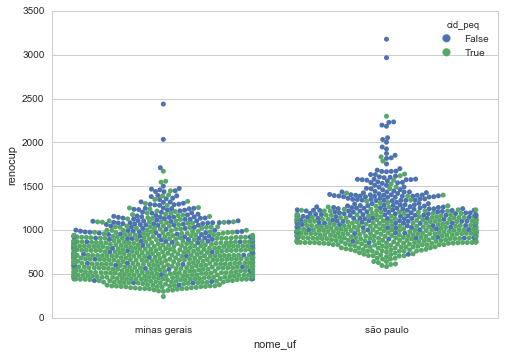

In [228]:
# algorithm that avoids overlapping points (demora um pouco)
sns.swarmplot(atlas3.nome_uf, atlas3.renocup, hue='cid_peq', data=atlas)

# quando rótulos são longos, mude a direção do gráfico para horizontal

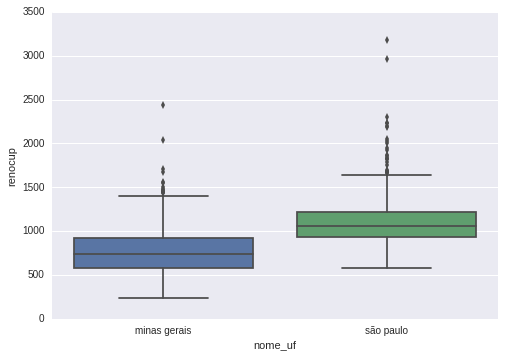

In [19]:
# he “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

boxplot('nome_uf', 'renocup', data=atlas3)

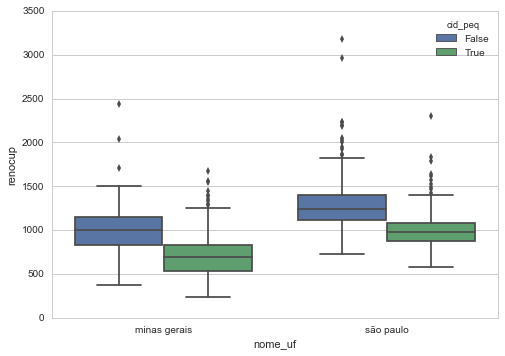

In [243]:
sns.boxplot('nome_uf', 'renocup', hue='cid_peq', data=atlas3)

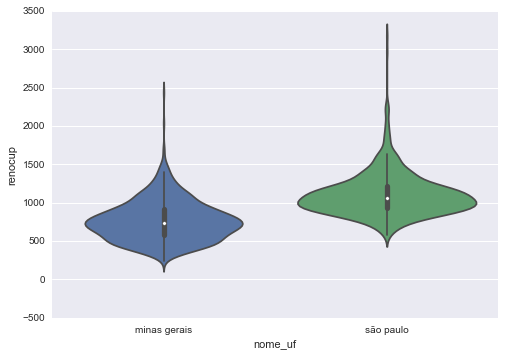

In [246]:
# combines a boxplot with the kernel density estimation procedure described in the distributions tutorial
sns.violinplot('nome_uf', 'renocup', data=atlas3)

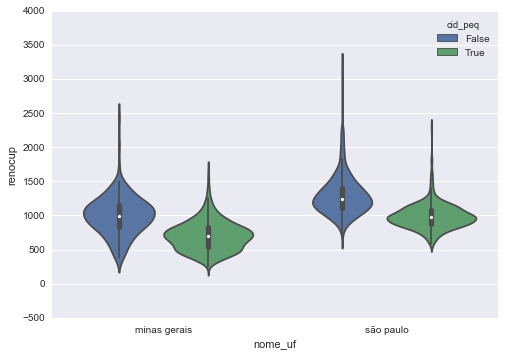

In [247]:
sns.violinplot('nome_uf', 'renocup', hue='cid_peq', data=atlas3)

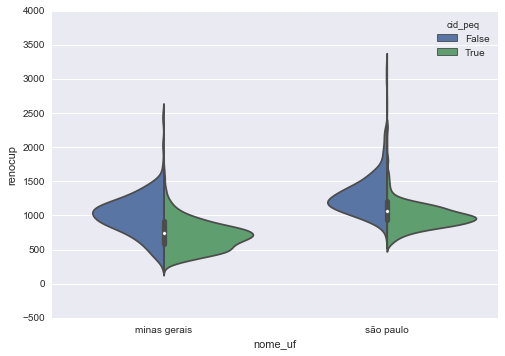

In [248]:
sns.violinplot('nome_uf', 'renocup', hue='cid_peq', split=True, data=atlas3)

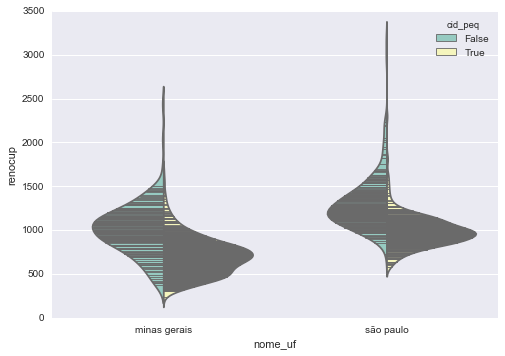

In [251]:
sns.violinplot('nome_uf', 'renocup', hue='cid_peq', split=True, inner='stick', palette='Set3', data=atlas3)

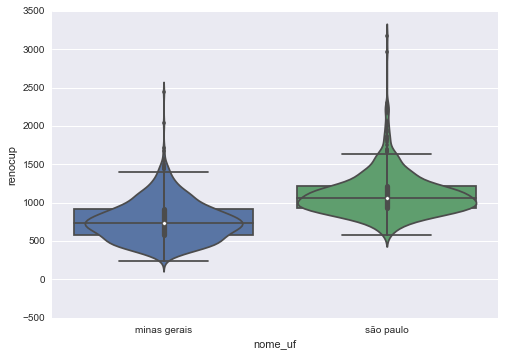

In [253]:
# é possível combinar os diferentes tipos
sns.boxplot('nome_uf', 'renocup', data=atlas3)
sns.violinplot('nome_uf', 'renocup', data=atlas3);

In [ ]:
# shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars


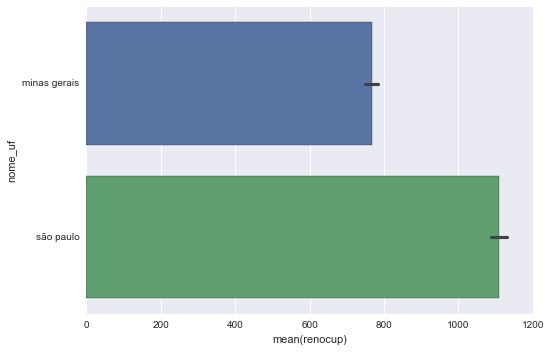

In [29]:
barplot('renocup', 'nome_uf', data=atlas3);

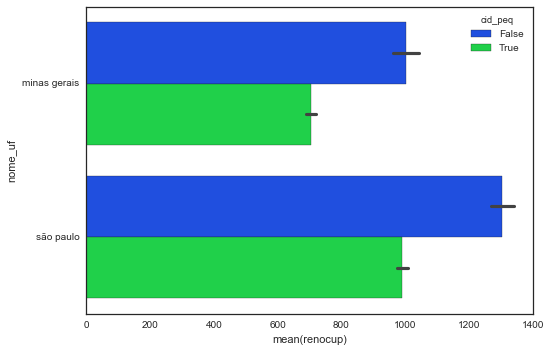

In [30]:
set_palette(color_palette(palette='bright'))
set_style("white")
barplot('renocup', 'nome_uf', hue='cid_peq', data=atlas3);

# palettable

In [18]:
x = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors

In [19]:
x

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

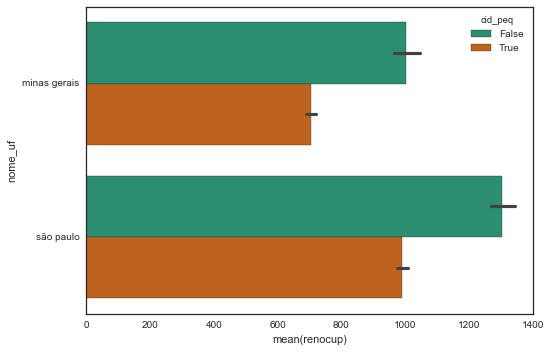

In [23]:
sns.set_palette(x)
sns.set_style("white")
sns.barplot('renocup', 'nome_uf', hue='cid_peq', data=atlas3);

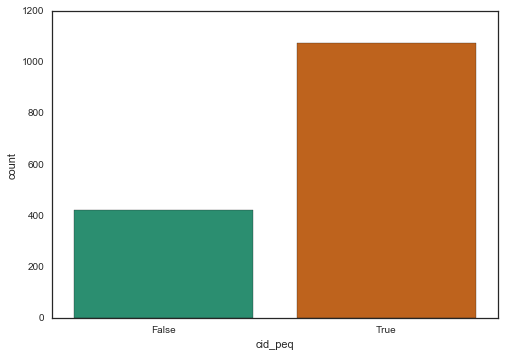

In [21]:
# A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable.
sns.countplot(atlas3.cid_peq, palette=x);


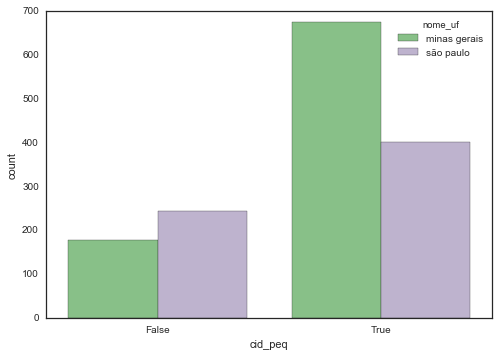

In [268]:
sns.countplot('cid_peq', hue='nome_uf', data=atlas3, palette="Accent");

In [269]:
# para controlar o tamanho, use comandos do matplotlib
f, ax = plt.subplots(figsize=(7, 3))

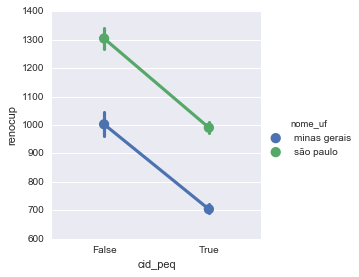

In [277]:
# para criar grades, use factorplot (equivalente de lm), padrão é pairplot, mas é possível mudar usando kind
sns.factorplot('cid_peq', 'renocup', hue='nome_uf', data=atlas3);

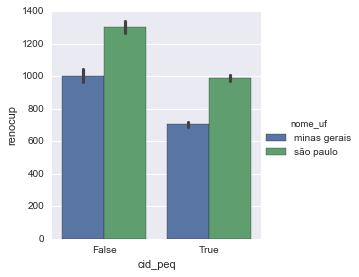

In [276]:
sns.factorplot('cid_peq', 'renocup', hue='nome_uf', kind='bar', data=atlas3);

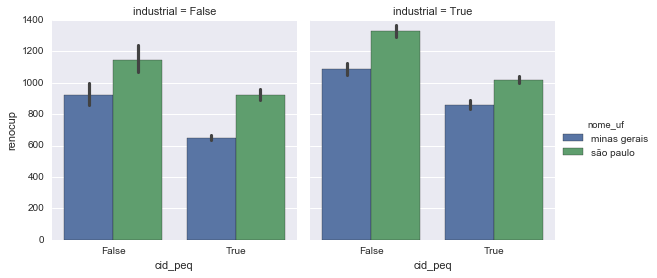

In [278]:
sns.factorplot('cid_peq', 'renocup', hue='nome_uf', col='industrial', kind='bar', data=atlas3);

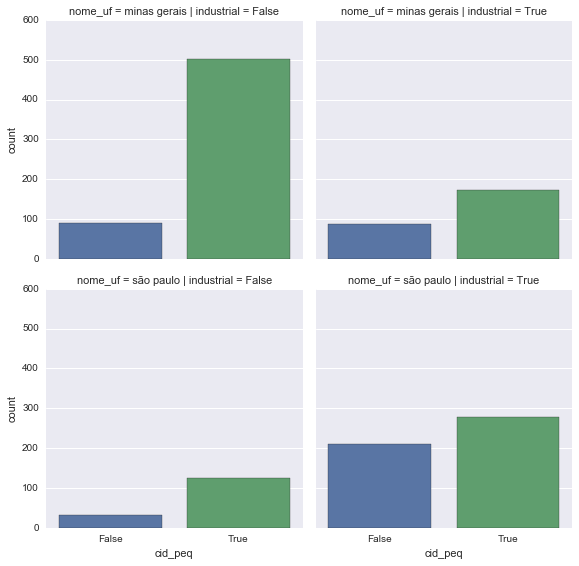

In [287]:
sns.factorplot('cid_peq', row='nome_uf', col='industrial', kind='count', data=atlas3);

In [3]:
atlas4 = atlas.query('nome_uf == "minas gerais"')
atlas4.shape

(853, 84)

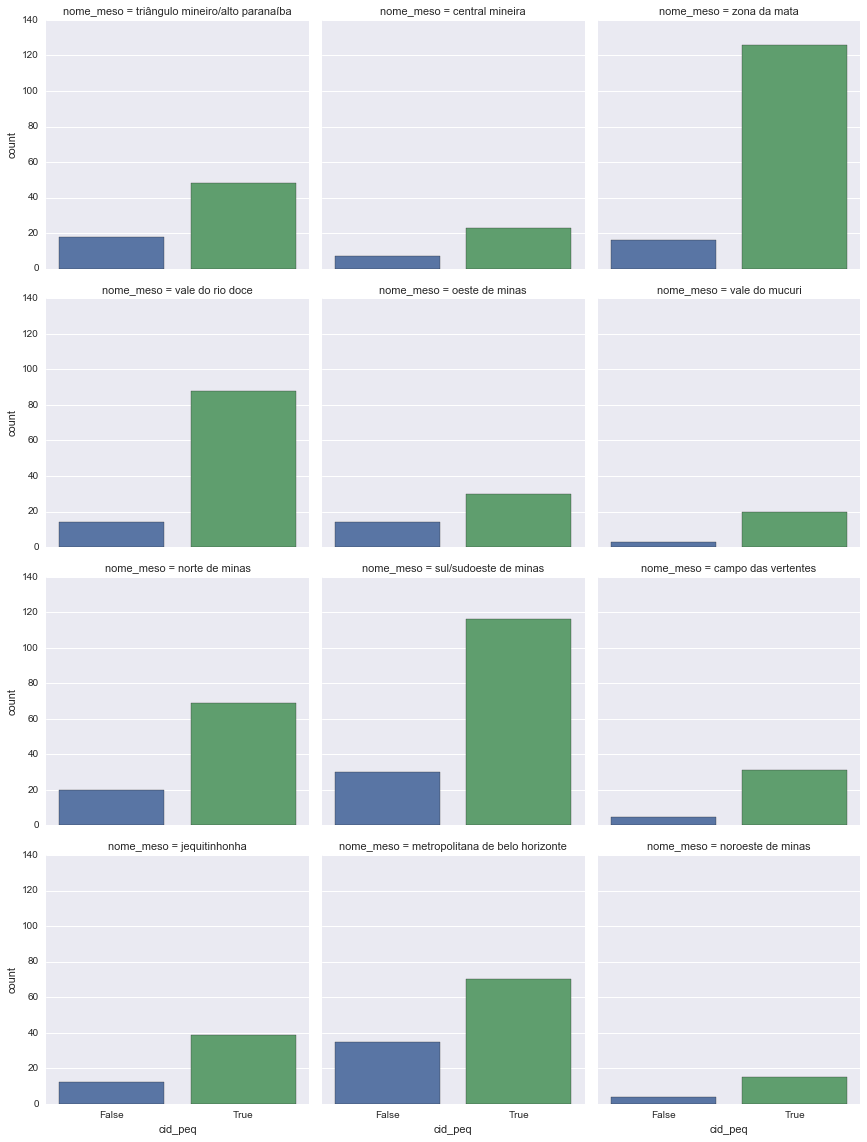

In [294]:
# col_wrap
sns.factorplot('cid_peq', col='nome_meso', col_wrap=3, kind='count', data=atlas4);

Any kind of plot can be drawn. Because of the way FacetGrid works, to change the size and shape of the figure you need to specify the size and aspect arguments, which apply to each facet.  
It is important to note that you could also make this plot by using boxplot() and FacetGrid directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a Categorical datatype or by passing order and hue_order.

## Facet/trellis/lattice

Facilita a identificação de padrões em subsets.  
Some seaborn functions (such as lmplot(), factorplot(), and pairplot()) also use them behind the scenes. Unlike other seaborn functions that are “Axes-level” and draw onto specific (possibly already-existing) matplotlib Axes without otherwise manipulating the figure, these higher-level functions create a figure when called and are generally more strict about how it gets set up.

Há **muito** mais coisas sobre isso [aqui](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

In [ ]:
sns.set(style='white')

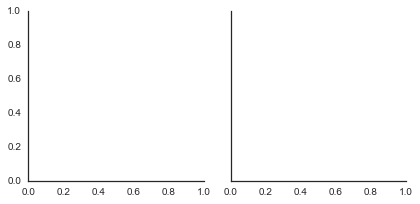

In [20]:
sns.FacetGrid(atlas3, col='nome_uf');

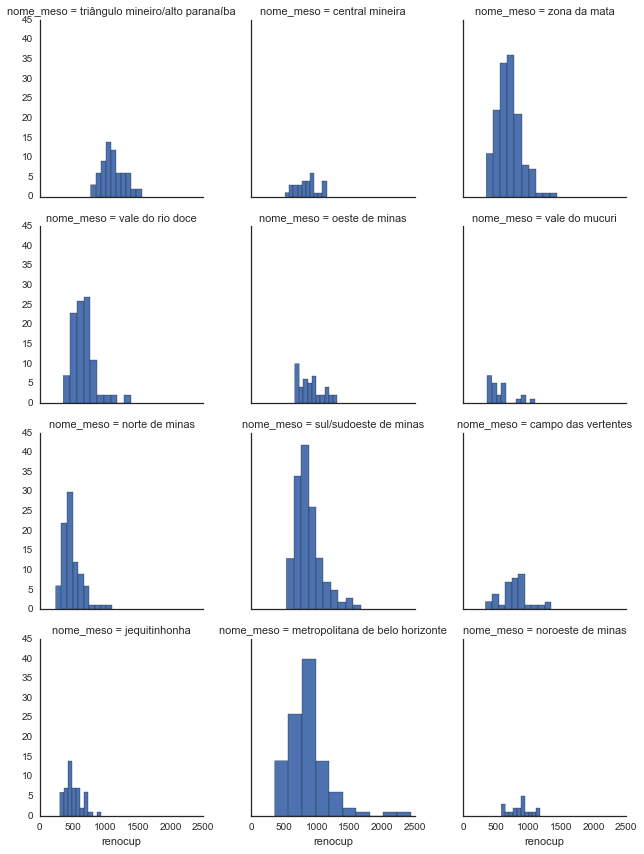

In [9]:
s = sns.FacetGrid(atlas4, col='nome_meso', col_wrap=3)
s.map(plt.hist, 'renocup');

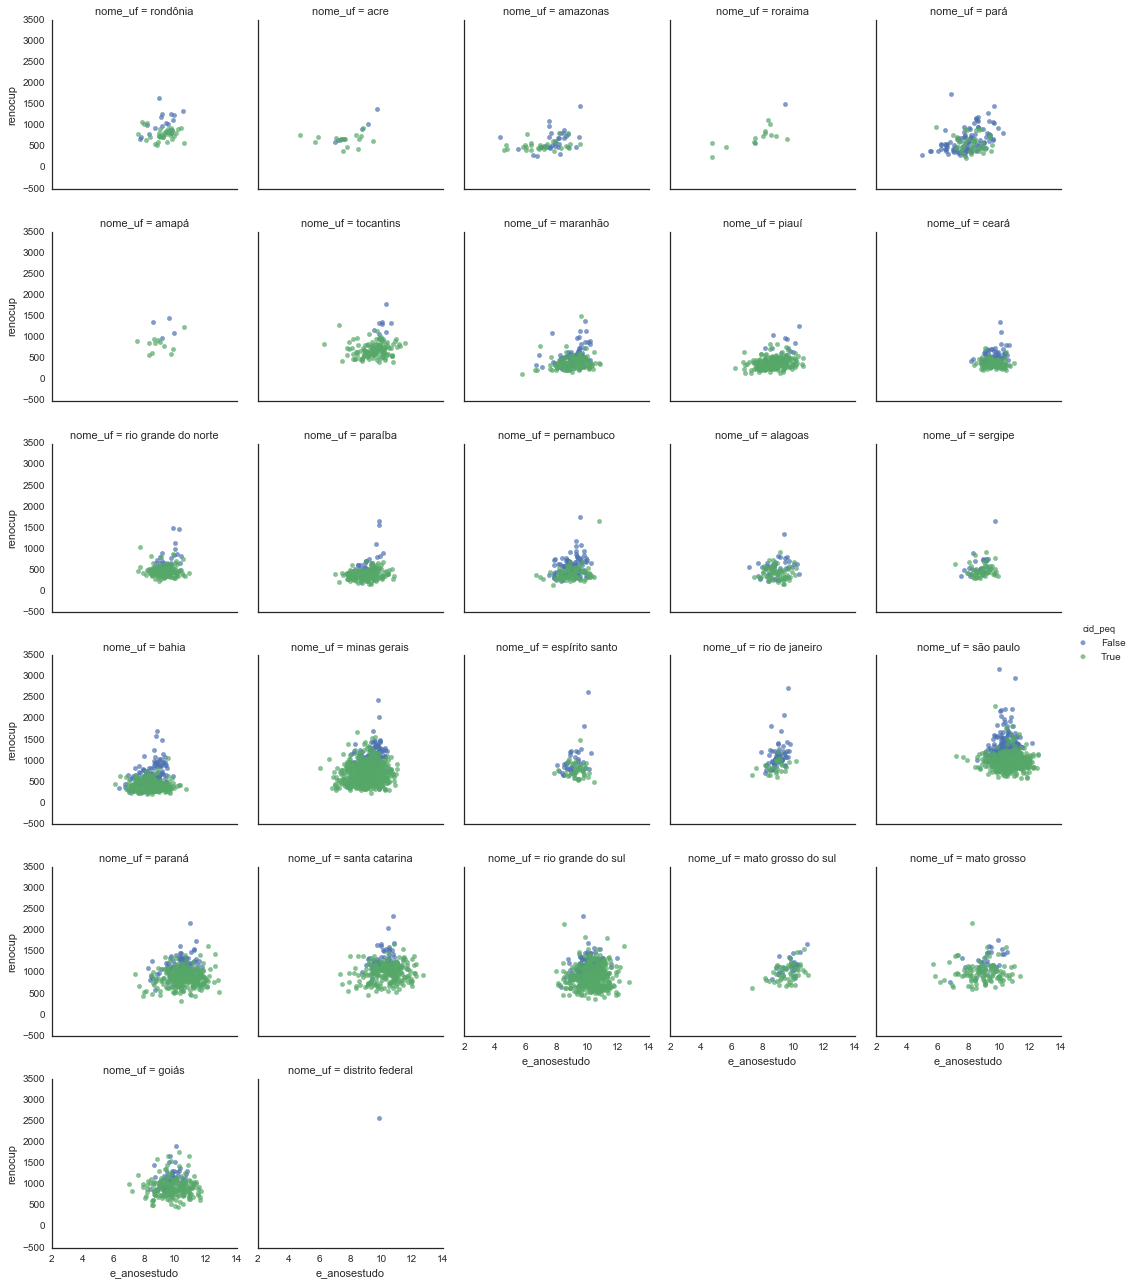

In [16]:
s = sns.FacetGrid(atlas, col='nome_uf', hue='cid_peq', col_wrap=5)
s.map(plt.scatter, 'e_anosestudo', 'renocup', alpha=.7)
s.add_legend();

# Matriz de diagramas de dispersão

It’s important to understand the differences between a FacetGrid and a PairGrid. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using PairGrid can give you a very quick, very high-level summary of interesting relationships in your dataset. The basic usage of the class is very similar to FacetGrid. First you initialize the grid, then you pass plotting function to a map method and it will be called on each subplot. There is also a companion function, pairplot() that trades off some flexibility for faster plotting.



In [32]:
atlas5 = atlas3[['nome_uf', 'fectot', 'renocup', 'e_anosestudo']]

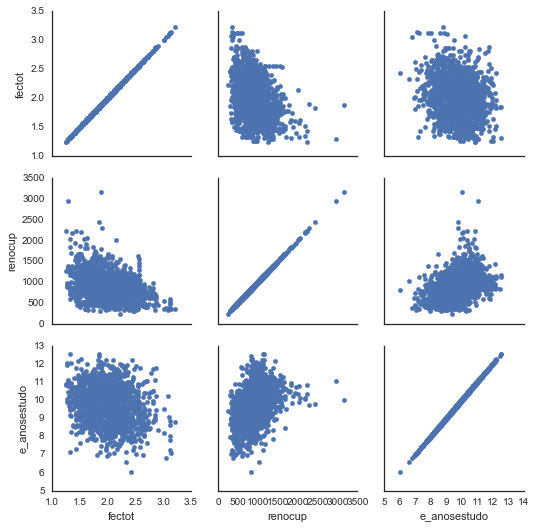

In [33]:
g = sns.PairGrid(atlas5)
g.map(plt.scatter);

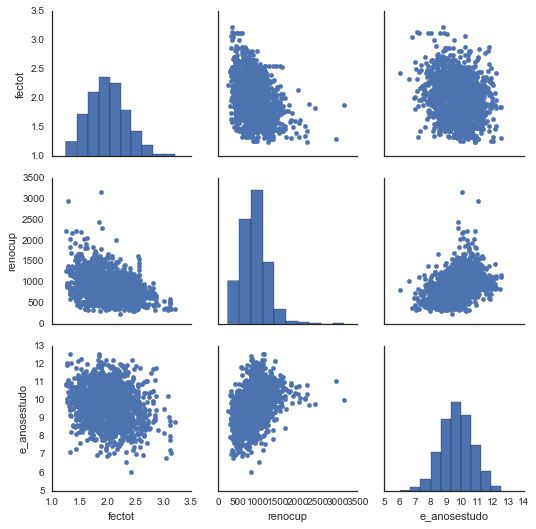

In [34]:
g = sns.PairGrid(atlas5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
# problema: as marcações dos exiso deixam de ser significativas para todos os gráficos 

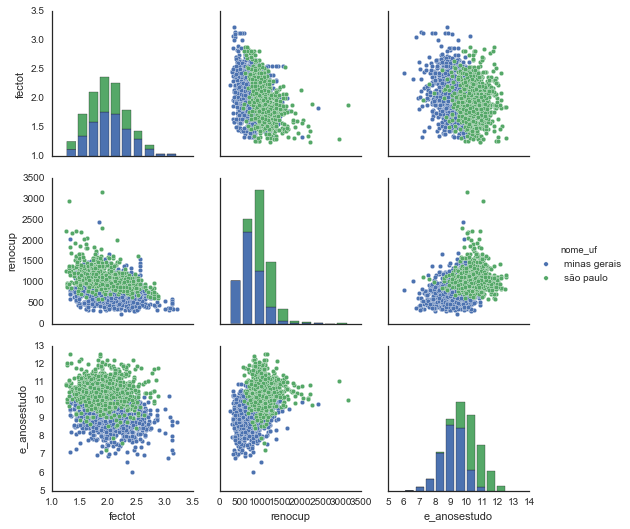

In [49]:
g = sns.PairGrid(atlas5, hue='nome_uf')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, edgecolor='white')
g.add_legend();
# problema: as marcações dos exiso deixam de ser significativas para todos os gráficos 

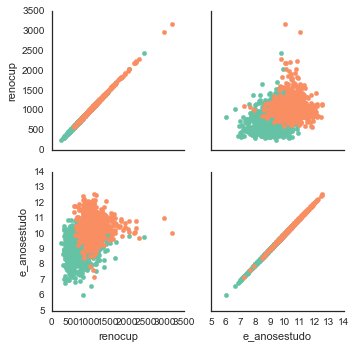

In [37]:
# By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.
g = sns.PairGrid(atlas5, vars=['renocup', 'e_anosestudo'], hue='nome_uf', palette='Set2')
g.map(plt.scatter);

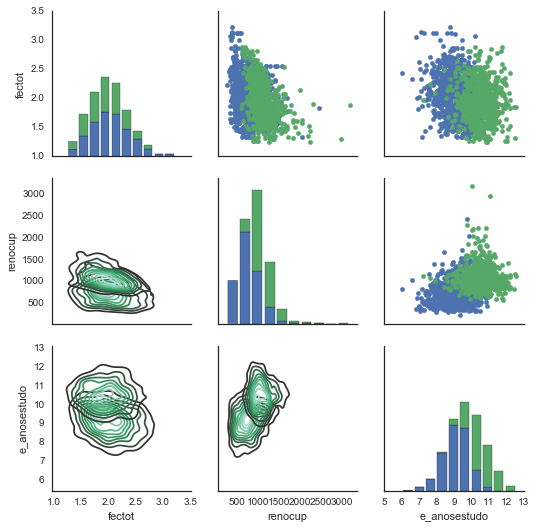

In [43]:
# usar funções diferentes nos triângulos
g = sns.PairGrid(atlas5, hue='nome_uf')
g.map_upper(plt.scatter)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, lw=3, legend=False);

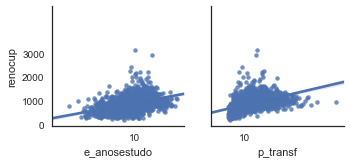

In [48]:
g = sns.PairGrid(atlas3, y_vars=['renocup'], x_vars=['e_anosestudo', 'p_transf'])
g.map(sns.regplot)
g.set(ylim=(0, 5000), yticks=[0, 1000, 2000, 3000], xticks=[10]);

## Clustermap 

Várias modificações possíveis, [aqui](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html#seaborn.clustermap).

In [ ]:
import seaborn as sns; sns.set()
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
g = sns.clustermap(flights)

## Modificações estéticas

In [105]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

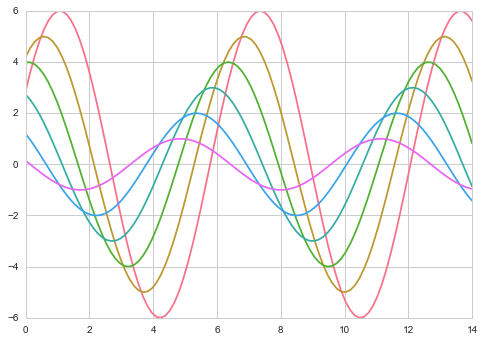

In [106]:
sinplot()

We find that the grid aids in the use of figures for conveying quantitative information – in almost all cases, figures should be preferred to tables. The white-on-gray grid that is used by default avoids being obtrusive. The grid is particularly useful in giving structure to figures with multiple facets, which is central to some of the more complex tools in the library.

default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements 

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the axes_style() and set_style() functions. To scale the plot, use the plotting_context() and set_context() functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

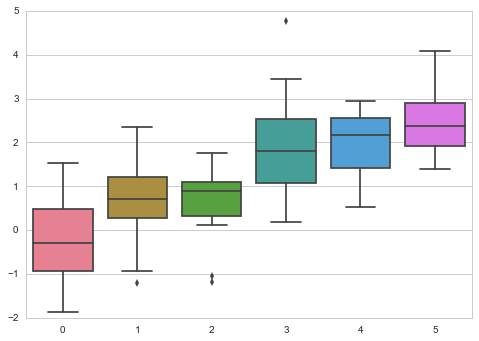

In [118]:
# five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

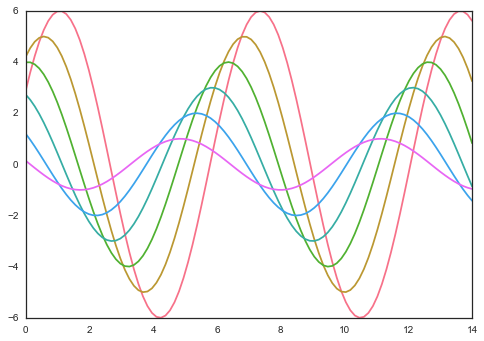

In [122]:
# apresentações não precisam de grade
sns.set_style("white")
sinplot()

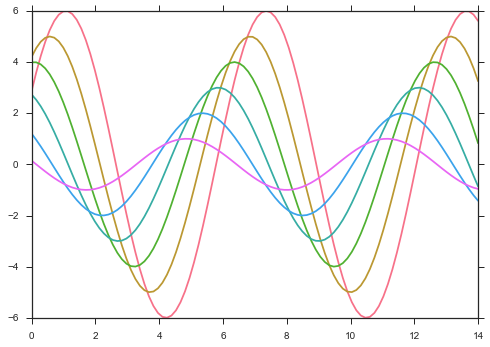

In [121]:
# para um pouco mais de estrutura
sns.set_style("ticks")
sinplot()

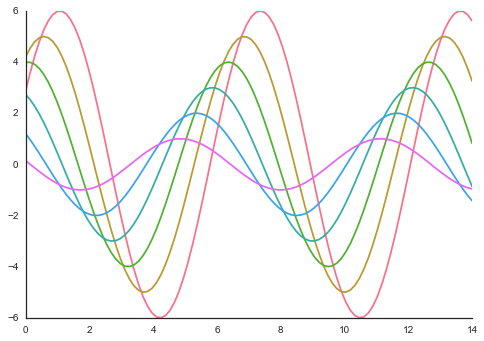

In [123]:
# tirar contra-eixos
sinplot()
sns.despine()

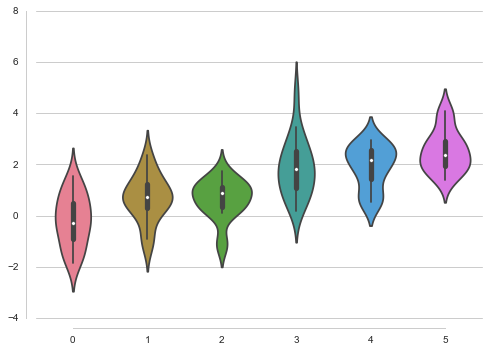

In [139]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

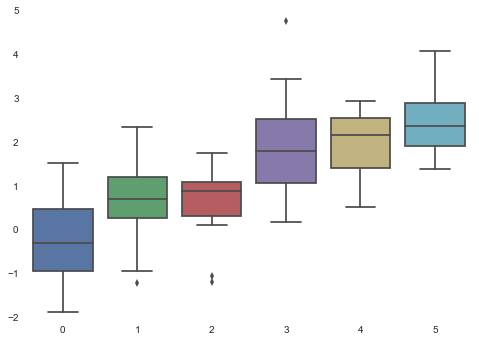

In [143]:
# especificar quais eixos tirar
sns.set_style("white")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True, bottom=True)

### temporary settings

axes_style() function in a with statement to temporarily set plot parameters.   
This also allows you to make figures with differently-styled axes




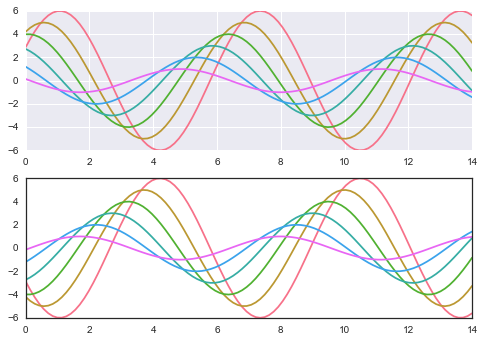

In [144]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level set() function takes a dictionary of any matplotlib parameters).

In [145]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

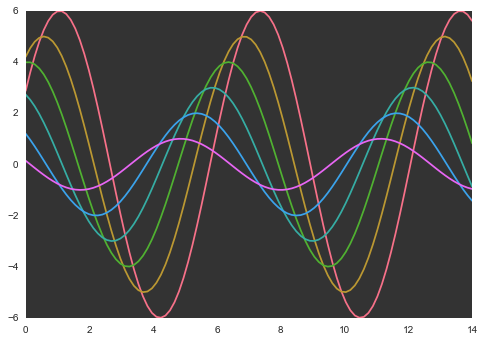

In [159]:
sns.set_style("dark", {"axes.facecolor": ".2", 'grid.color': '.2'})
sinplot()

In [175]:
# para resetar
sns.set()

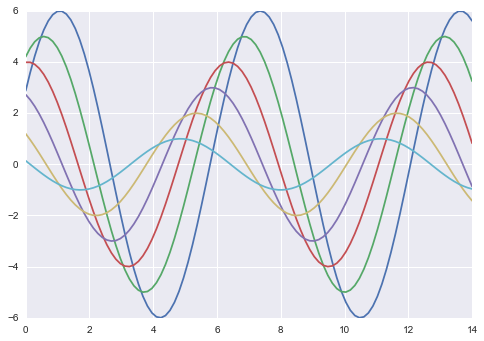

In [161]:
sinplot()

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate. The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default

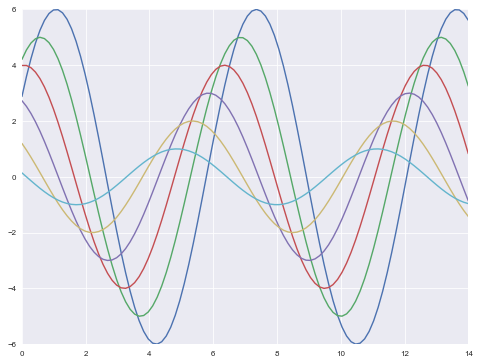

In [163]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

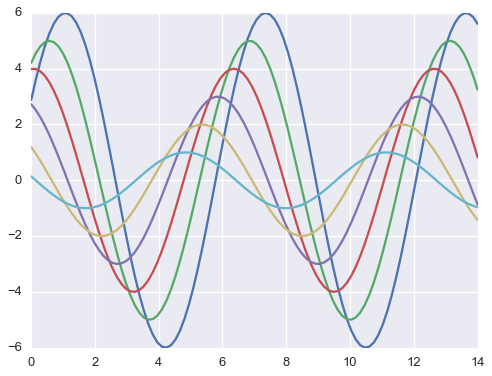

In [166]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

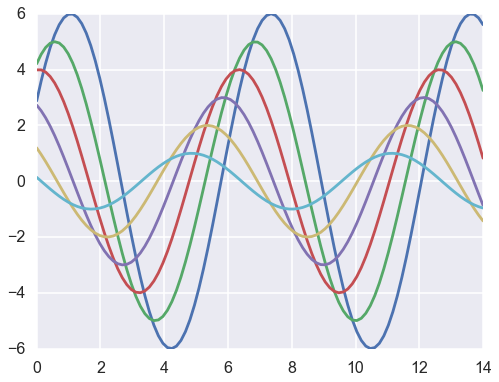

In [167]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

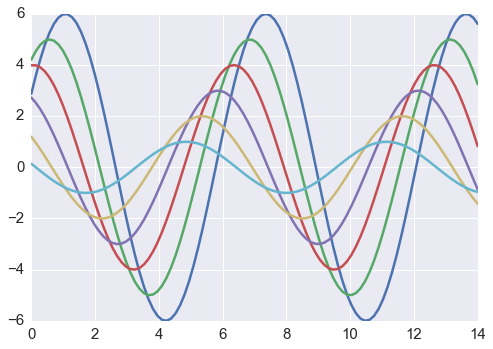

In [168]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

In [169]:
sns.plotting_context()

{'axes.labelsize': 16.5,
 'axes.titlesize': 18.0,
 'figure.figsize': [8.0, 5.5],
 'font.size': 18.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 15.0,
 'lines.linewidth': 2.5,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 15.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 15.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

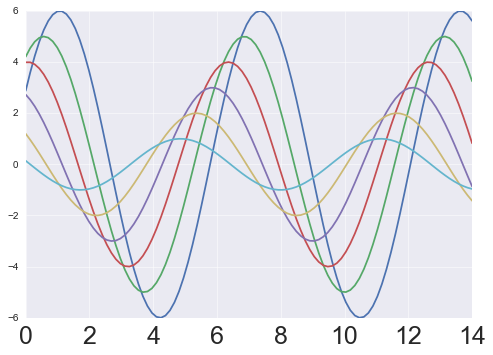

In [182]:
sns.set_context({'grid.linewidth' : .5, 'xtick.labelsize': 25.0})
sinplot()

## Colors

Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly.

Explicações detalhadas, com teoria,  em color_palettes.ipynb (docs).
Especialmente sobre color_brewer (categorical, sequential, divergent)

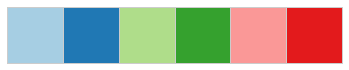

In [54]:
# There are six variations of the default theme, called ``deep``, ``muted``, ``pastel``, ``bright``, ``dark``, and ``colorblind``.
current_palette = sns.color_palette()
sns.palplot(current_palette)

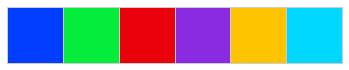

In [70]:
sns.palplot(sns.color_palette('bright'))

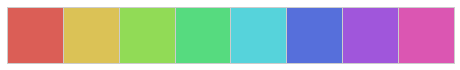

In [55]:
# para gerar mais do que 6 cores
sns.palplot(sns.color_palette("hls", 8))

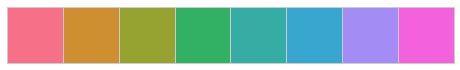

In [58]:
# opção com vantagens teóricas 
sns.palplot(sns.color_palette("husl", 8))

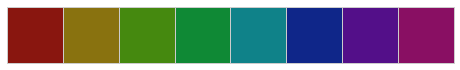

In [56]:
# para controlar brilho e saturação
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

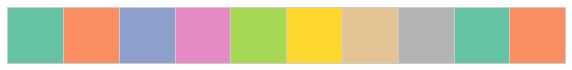

In [60]:
sns.palplot(sns.color_palette("Set2", 10))

In [39]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

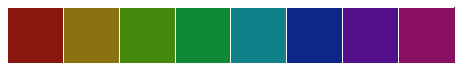

In [40]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

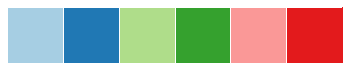

In [41]:
sns.palplot(sns.color_palette("Paired"))

In [44]:
dados = pd.DataFrame({
        'A':[2, 3, 4],
        'B':[7, 6, 9]
    })

In [46]:
dados

   A  B
0  2  7
1  3  6
2  4  9

In [73]:
sns.set_palette?

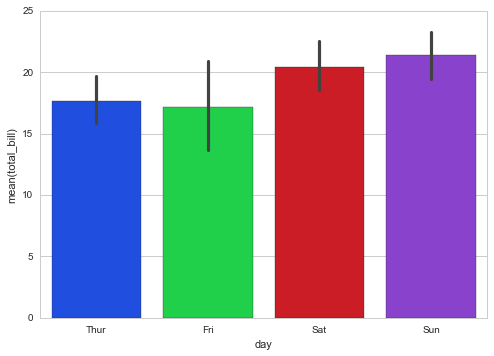

In [83]:
sns.set_palette(sns.color_palette(palette='bright'))
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)


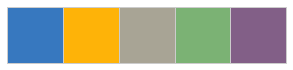

In [77]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

In [79]:
sns.color_palette(palette='bright', n_colors=None, desat=None)

[(0.0, 0.24705882352941178, 1.0),
 (0.011764705882352941, 0.9294117647058824, 0.22745098039215686),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5411764705882353, 0.16862745098039217, 0.8862745098039215),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

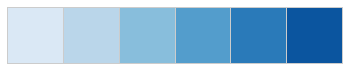

In [84]:
sns.palplot(sns.color_palette("Blues"))

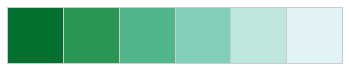

In [86]:
# inverter ordem
sns.palplot(sns.color_palette("BuGn_r"))

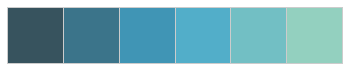

In [88]:
# para escurecer
sns.palplot(sns.color_palette("GnBu_d"))

[(0.95755478915046244, 0.95755478915046244, 0.95755478915046244),
 (0.90120723387774304, 0.90120723387774304, 0.90120723387774304),
 (0.83289505032932054, 0.83289505032932054, 0.83289505032932054),
 (0.75021916137022127, 0.75021916137022127, 0.75021916137022127),
 (0.64341409276513495, 0.64341409276513495, 0.64341409276513495),
 (0.53871589525073182, 0.53871589525073182, 0.53871589525073182),
 (0.44032295626752516, 0.44032295626752516, 0.44032295626752516),
 (0.34288351570858677, 0.34288351570858677, 0.34288351570858677),
 (0.22329873945198808, 0.22329873945198808, 0.22329873945198808),
 (0.1046981975144031, 0.1046981975144031, 0.1046981975144031)]

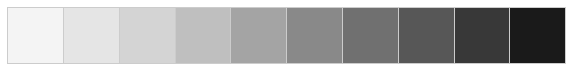

In [93]:
# ahhhhhhhhhhhhhhhhhh
sns.choose_colorbrewer_palette('sequential')

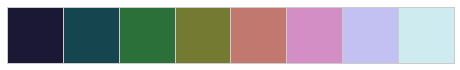

In [95]:
# para manter a informação em p&b
sns.palplot(sns.color_palette("cubehelix", 8))

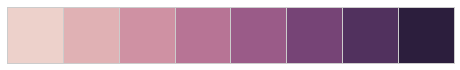

In [96]:
sns.palplot(sns.cubehelix_palette(8))

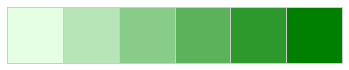

In [97]:
sns.palplot(sns.light_palette("green"))

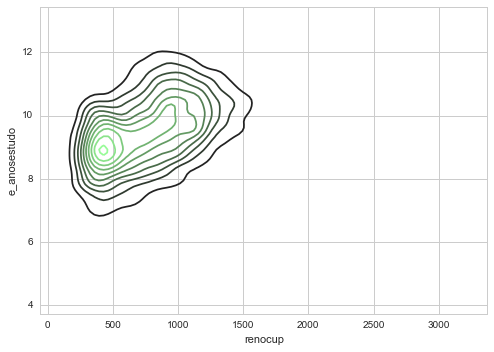

In [98]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

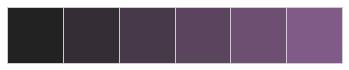

In [99]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

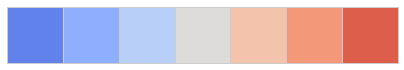

In [100]:
sns.palplot(sns.color_palette("coolwarm", 7))

Changing default palettes with :func:`set_palette`
--------------------------------------------------

The :func:`color_palette` function has a companion called :func:`set_palette`. The relationship between them is similar to the pairs covered in the :ref:`aesthetics tutorial <aesthetics_tutorial>`. :func:`set_palette` accepts the same arguments as :func:`color_palette`, but it changes the default matplotlib parameters so that the palette is used for all plots.

In [101]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

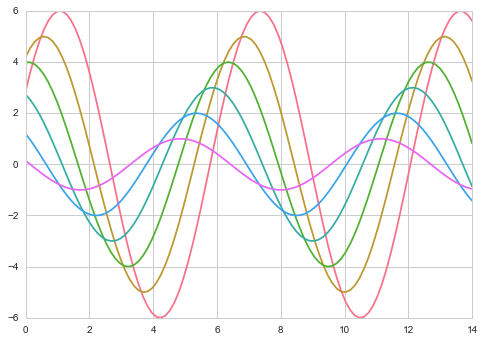

In [102]:
sns.set_palette("husl")
sinplot()

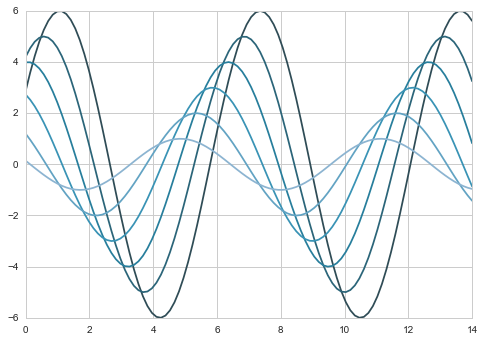

In [103]:
# with muda apenas temporariamente
with sns.color_palette("PuBuGn_d"):
    sinplot()